### IMPORT REQUIRED PACKAGES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance

### IMPORT SAMPLE DATA

In [2]:
data_for_model = pd.read_csv("finaldata.csv")

In [3]:
# Drop necessary columns

data_for_model.drop(["url", "population", "area", "foreign_travelers",
                     "covid_total", "covid_active", "longitude", "latitude"], axis = 1, inplace = True)

In [4]:
# Shuffle data

data_for_model = shuffle(data_for_model, random_state = 42)

### DEAL WITH MISSING VALUES

In [5]:
data_for_model.isna().sum()

rating                 5005
guests                    0
number_of_beds            0
number_of_bedrooms        0
number_of_bathrooms       0
                       ... 
entire_place              0
entire_resort             0
entire_villa              0
farm_stay                 0
island                    0
Length: 197, dtype: int64

In [6]:
data_for_model.dropna(how = "any", inplace = True)

### SPLIT INPUT VARIABLES & OUTPUT VARIABLES

In [7]:
X = data_for_model.drop(["price_per_night"], axis = 1)
y = data_for_model["price_per_night"]

### SPLIT OUT TRAINING & TEST SETS

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### MODEL TRAINING

In [9]:
regressor = RandomForestRegressor(random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### MODEL ASSESSMENT

In [10]:
# Predict on the Test Set

y_pred = regressor.predict(X_test)

In [11]:
# Calculate R-Squared

r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.6499101735144804


In [12]:
# Cross Validation (CV)

cv = KFold(n_splits = 4, shuffle = True, random_state = 42)
cv_scores = cross_val_score(regressor, X_train, y_train, cv = cv, scoring = "r2")
cv_scores.mean()

0.5662174251020685

In [13]:
# Calculate Adjusted R-Squared

num_data_points, num_input_vars = X_test.shape
adjusted_r_squared = 1 - (1 - r_squared) * (num_data_points - 1) / (num_data_points - num_input_vars - 1)
print(adjusted_r_squared)

0.5863164700935705


### FEATURE IMPORTANCE

In [14]:
feature_importance = pd.DataFrame(regressor.feature_importances_)
feature_names = pd.DataFrame(X.columns)
feature_importance_summary = pd.concat([feature_names, feature_importance], axis = 1)
feature_importance_summary.columns = ["input_variable", "feature_importance"]
feature_importance_summary.sort_values(by = "feature_importance", inplace = True)

<AxesSubplot:xlabel='feature_importance', ylabel='input_variable'>

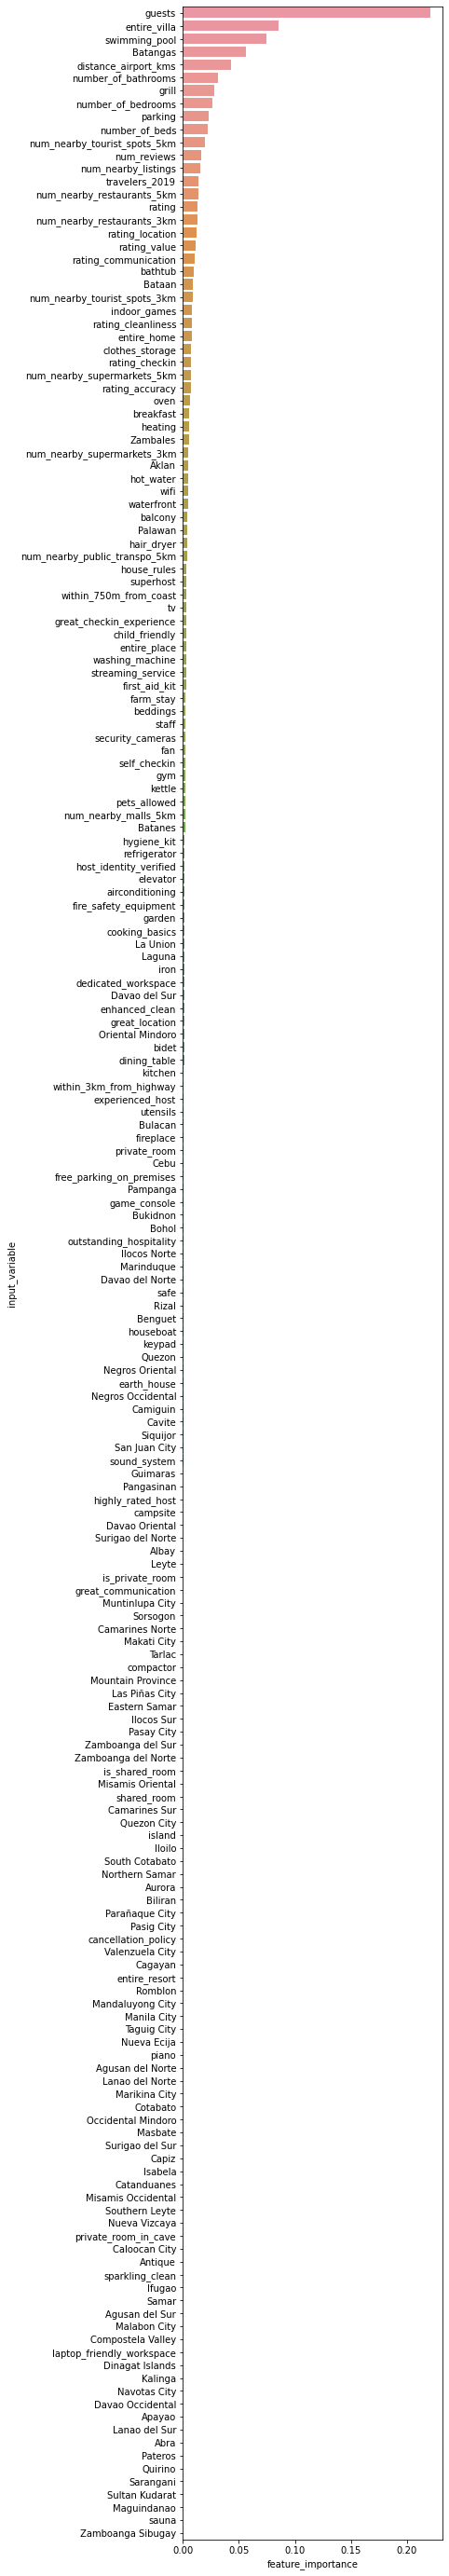

In [15]:
# Set the figure size
plt.figure(figsize=(5, 50))

feature_importance_summary = feature_importance_summary.sort_values(['feature_importance'], ascending=False).reset_index(drop=True)

# plot a bar chart
sns.barplot(
    y=feature_importance_summary["input_variable"], 
    x=feature_importance_summary["feature_importance"], 
    data=feature_importance_summary)

### PERMUTATION IMPORTANCE

In [16]:
result = permutation_importance(regressor, X_test, y_test, n_repeats = 10, random_state = 42)
result

{'importances_mean': array([-6.48543862e-04,  3.62276029e-01,  5.82428654e-03,  1.45711797e-02,
         2.84320547e-02, -6.89629442e-04,  4.44992014e-04,  8.42708705e-04,
         4.82101251e-03,  1.17928736e-03,  7.61654270e-03,  4.66854089e-03,
        -2.54491762e-04,  3.79074440e-04,  2.87934016e-05, -2.11312090e-03,
        -3.99028143e-05,  1.02159362e-03,  2.36959628e-03,  2.26033072e-03,
         1.23746249e-03,  3.70813110e-03,  1.10840679e-03,  7.78957228e-04,
         0.00000000e+00,  2.35389540e-03,  0.00000000e+00, -3.60997599e-03,
        -2.17455363e-04,  3.09910772e-04,  3.42411800e-03,  0.00000000e+00,
         1.29556590e-01, -3.51949416e-05,  1.50220462e-03,  2.22761042e-03,
         1.21031779e-02,  2.69186575e-04,  1.11634548e-03,  2.83162075e-04,
         2.24551478e-04,  2.88544058e-04,  1.22069691e-03,  3.48407004e-04,
         6.27254452e-04, -4.96689263e-04,  6.16459995e-03,  3.01628548e-02,
         2.88239516e-04, -1.39740492e-03,  3.11386967e-03,  2.782423

In [17]:
permutation_importance = pd.DataFrame(result["importances_mean"])
feature_names = pd.DataFrame(X.columns)
permutation_importance_summary = pd.concat([feature_names, permutation_importance], axis = 1)
permutation_importance_summary.columns = ["input_variable", "permutation_importance"]
permutation_importance_summary.sort_values(by = "permutation_importance", inplace = True)

<AxesSubplot:xlabel='permutation_importance', ylabel='input_variable'>

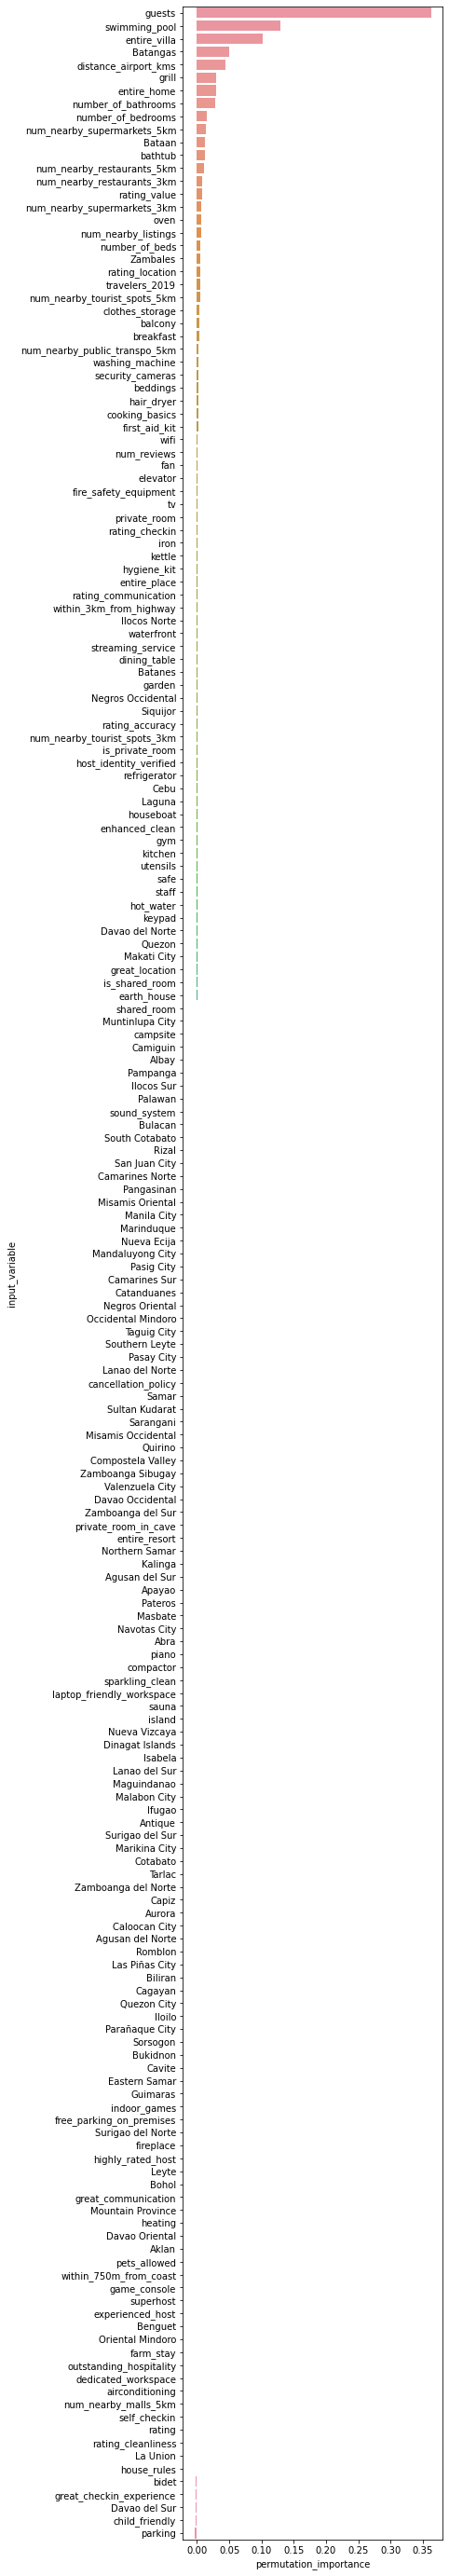

In [18]:
# Set the figure size
plt.figure(figsize=(5, 50))

permutation_importance_summary = permutation_importance_summary.sort_values(['permutation_importance'], ascending=False).reset_index(drop=True)

# plot a bar chart
sns.barplot(
    y=permutation_importance_summary["input_variable"], 
    x=permutation_importance_summary["permutation_importance"], 
    data=permutation_importance_summary)

### PREDICTIONS UNDER THE HOOD

In [19]:
y_pred[0]
new_data = [X_test.iloc[0]]
print(new_data)
regressor.estimators_

[rating                 4.87
guests                 1.00
number_of_beds         1.00
number_of_bedrooms     1.00
number_of_bathrooms    1.00
                       ... 
entire_place           0.00
entire_resort          0.00
entire_villa           0.00
farm_stay              0.00
island                 0.00
Name: 5003, Length: 196, dtype: float64]


[DecisionTreeRegressor(max_features='auto', random_state=1608637542),
 DecisionTreeRegressor(max_features='auto', random_state=1273642419),
 DecisionTreeRegressor(max_features='auto', random_state=1935803228),
 DecisionTreeRegressor(max_features='auto', random_state=787846414),
 DecisionTreeRegressor(max_features='auto', random_state=996406378),
 DecisionTreeRegressor(max_features='auto', random_state=1201263687),
 DecisionTreeRegressor(max_features='auto', random_state=423734972),
 DecisionTreeRegressor(max_features='auto', random_state=415968276),
 DecisionTreeRegressor(max_features='auto', random_state=670094950),
 DecisionTreeRegressor(max_features='auto', random_state=1914837113),
 DecisionTreeRegressor(max_features='auto', random_state=669991378),
 DecisionTreeRegressor(max_features='auto', random_state=429389014),
 DecisionTreeRegressor(max_features='auto', random_state=249467210),
 DecisionTreeRegressor(max_features='auto', random_state=1972458954),
 DecisionTreeRegressor(max_f

In [20]:
predictions = []
tree_count = 0
for tree in regressor.estimators_:
    prediction = tree.predict(new_data)[0]
    predictions.append(prediction)
    tree_count += 1

In [21]:
sum(predictions) / tree_count

953.33